### Fruits 360

Creating a simple fruit classifier using outof the box fastai

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/fruits
/kaggle/input/fruits/fruits-360
/kaggle/input/fruits/fruits-360/Training
/kaggle/input/fruits/fruits-360/Training/Nectarine Flat
/kaggle/input/fruits/fruits-360/Training/Peach 2
/kaggle/input/fruits/fruits-360/Training/Nut Pecan
/kaggle/input/fruits/fruits-360/Training/Pear Williams
/kaggle/input/fruits/fruits-360/Training/Pomegranate
/kaggle/input/fruits/fruits-360/Training/Granadilla
/kaggle/input/fruits/fruits-360/Training/Tangelo
/kaggle/input/fruits/fruits-360/Training/Pear Red
/kaggle/input/fruits/fruits-360/Training/Apple Golden 3
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black
/kaggle/input/fruits/fruits-360/Training/Papaya
/kaggle/input/fruits/fruits-360/Training/Apple Red 3
/kaggle/input/fruits/fruits-360/Training/Apple Pink Lady
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow
/kaggle/input/fruits/fruits-360/Training/Cactus fruit
/kaggle/input/fruits/fruits-360/Training/Corn Husk
/kaggle/input/fruits/fruits-360/Training/Grap

/kaggle/input/fruits/fruits-360/Test/Apple Golden 1
/kaggle/input/fruits/fruits-360/Test/Apricot
/kaggle/input/fruits/fruits-360/Test/Pepper Red
/kaggle/input/fruits/fruits-360/Test/Walnut
/kaggle/input/fruits/fruits-360/Test/Maracuja
/kaggle/input/fruits/fruits-360/Test/Salak
/kaggle/input/fruits/fruits-360/Test/Kiwi
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2
/kaggle/input/fruits/fruits-360/Test/Watermelon
/kaggle/input/fruits/fruits-360/Test/Mango
/kaggle/input/fruits/fruits-360/Test/Apple Crimson Snow
/kaggle/input/fruits/fruits-360/Test/Cherry Wax Yellow
/kaggle/input/fruits/fruits-360/Test/Clementine
/kaggle/input/fruits/fruits-360/Test/Apple Red 1
/kaggle/input/fruits/fruits-360/Test/Apple Red 2
/kaggle/input/fruits/fruits-360/Test/Cherry Rainier
/kaggle/input/fruits/fruits-360/Test/Mango Red
/kaggle/input/fruits/fruits-360/Test/Potato Red
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon
/kaggle/input/fruits/fruits-360/Test/Grape Pink
/kaggle/input/fruits/fruits-360/T

In [5]:
!pip install fastbook

from fastai import *
from fastai.vision.all import *

     |████████████████████████████████| 719 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 46 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 40 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 84 kB 2.5 MB/s  eta 0:00:01
     |████████████████████████████████| 40 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 45 kB 2.4 MB/s  eta 0:00:01


  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.91
    Uninstalling sentencepiece-0.1.91:
      Successfully uninstalled sentencepiece-0.1.91
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.0.13
    Uninstalling fastcore-1.0.13:
      Successfully uninstalled fastcore-1.0.13


In [6]:
root_dir = '../input/fruits/fruits-360'

In [7]:
path = Path(root_dir + '/Test')
classes = []
for dirname,_,_ in os.walk(path):
    name = dirname.split('/')[-1].strip() 
    if (name != 'Test'):
        classes.append(name)

print(classes[:5])
print("Number of classes : ", len(classes))

['Nectarine Flat', 'Peach 2', 'Nut Pecan', 'Pear Williams', 'Pomegranate']
Number of classes :  131


In [8]:
fns =  get_image_files(path)

In [9]:
fns[:5]

(#5) [Path('../input/fruits/fruits-360/Test/Nectarine Flat/r2_74_100.jpg'),Path('../input/fruits/fruits-360/Test/Nectarine Flat/r2_84_100.jpg'),Path('../input/fruits/fruits-360/Test/Nectarine Flat/67_100.jpg'),Path('../input/fruits/fruits-360/Test/Nectarine Flat/r2_173_100.jpg'),Path('../input/fruits/fruits-360/Test/Nectarine Flat/r2_86_100.jpg')]

In [10]:
#failed = verify_images(fns)

In [11]:
#failed.map(Path.unlink)

In [12]:
fruits = DataBlock (
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [13]:
dls = fruits.dataloaders(path)

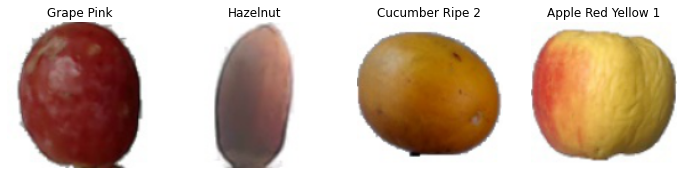

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

In [15]:
fruits = fruits.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                   batch_tfms=aug_transforms())

dls = fruits.dataloaders(path)

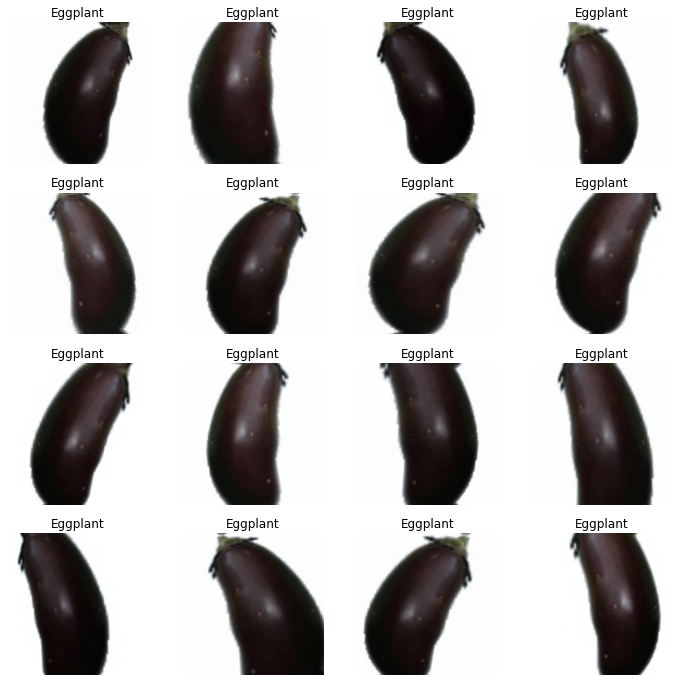

In [16]:
dls.show_batch(max_n=16, nrows=4, unique=True)

In [17]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.389758,0.032361,0.006833,01:42


epoch,train_loss,valid_loss,error_rate,time
0,0.100146,0.007124,0.001763,01:55
1,0.041170,0.002624,0.000441,01:54
2,0.013557,0.000106,0.000000,01:55
3,0.005228,0.000058,0.000000,01:55


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

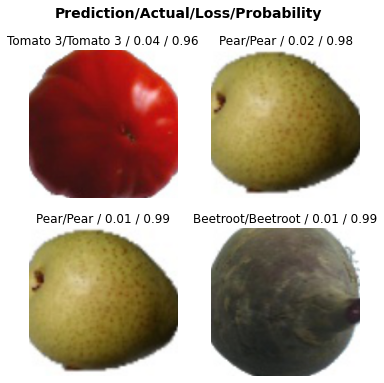

In [19]:
interp.plot_top_losses(4)

In [20]:
interp.vocab

(#131) ['Apple Braeburn','Apple Crimson Snow','Apple Golden 1','Apple Golden 2','Apple Golden 3','Apple Granny Smith','Apple Pink Lady','Apple Red 1','Apple Red 2','Apple Red 3'...]

In [21]:
# checking on a random fruit form test
learn.predict('../input/fruits/fruits-360/Test/Apple Granny Smith/321_100.jpg')

('Apple Granny Smith',
 tensor(5),
 tensor([1.7260e-09, 1.2860e-11, 1.0450e-13, 1.6339e-09, 2.3463e-10, 1.0000e+00,
         1.8471e-13, 9.8757e-13, 1.2768e-09, 2.5364e-12, 7.2729e-13, 5.9251e-13,
         2.9379e-12, 5.4503e-13, 3.4458e-13, 9.4168e-12, 8.9514e-12, 3.9032e-14,
         1.8835e-13, 7.9973e-13, 5.6717e-14, 7.9835e-14, 2.2099e-12, 3.4665e-14,
         8.3626e-14, 7.5556e-13, 1.0414e-14, 2.4784e-13, 3.1933e-15, 2.6719e-14,
         2.8960e-11, 3.9147e-12, 1.8271e-13, 1.6136e-13, 5.1620e-13, 1.6414e-14,
         1.1268e-12, 1.7236e-12, 3.2226e-13, 6.2351e-12, 9.1877e-12, 3.3731e-13,
         5.7122e-13, 2.3499e-10, 1.2172e-10, 3.1714e-14, 7.5665e-14, 6.5791e-09,
         2.5841e-14, 1.2866e-12, 2.4412e-12, 8.2375e-12, 5.3131e-14, 1.2982e-11,
         6.6159e-12, 1.5795e-12, 1.5195e-10, 1.4328e-12, 2.7552e-13, 1.0001e-12,
         1.9131e-14, 2.0861e-10, 1.6316e-12, 7.0949e-14, 9.2329e-09, 6.2332e-15,
         2.9531e-13, 2.0848e-12, 2.6453e-14, 9.0320e-13, 5.6972e-11, 1.994

correct prediction !

In [22]:
learn.export()